In [12]:
import pandas as pd
import numpy as npC
import os

headers = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'volumfe', 'WeightedPrice']
data = pd.DataFrame(columns=headers)

for filename in os.listdir('../datasets/bitcoin-5')[:5]:
    data = pd.concat([data, pd.read_csv(f'../datasets/bitcoin-5/{filename}', index_col=False)])
    print(filename)
    
data['Change'] = data['Open'] - data['Close']
data['PerChange'] = (data['Open'] - data['Close'])/data['WeightedPrice']

2020-06-01.csv
2020-06-02.csv
2020-06-03.csv
2020-06-04.csv
2020-06-05.csv


In [13]:
data = data.rename(columns={'Open':'open', 'High':'High', 'Low':'low', 'Close':'close'})

In [14]:
from finta import TA

In [20]:
TA.MACD(data)

,MACD,SIGNAL
0,0.000000,0.000000
1,-0.204167,-0.113426
2,-0.653975,-0.334962
3,-0.134879,-0.267184
4,0.090341,-0.160828
...,...,...
284,10.665455,11.367980
285,8.872165,10.868817
286,7.613351,10.217724
287,5.216122,9.217404


In [5]:
rocs = pd.DataFrame()
rocs['close'] = (TA.ROC(data, period=14) + TA.ROC(data, period=11))

In [6]:
TA.WMA(rocs, period=10)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
284    0.705978
285    0.506699
286    0.320660
287    0.091056
288   -0.016516
Name: 10 period WMA., Length: 1445, dtype: float64

In [30]:
bb = TA.BBANDS(data)
bb

,BB_UPPER,BB_MIDDLE,BB_LOWER
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
284,9858.214434,9808.740,9759.265566
285,9857.729156,9809.925,9762.120844
286,9855.709763,9811.860,9768.010237
287,9851.497819,9813.390,9775.282181


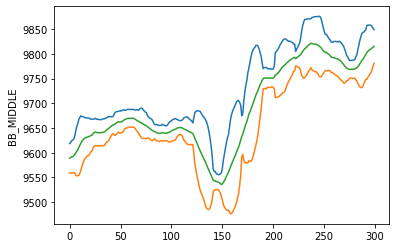

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

bb = bb[-300:]
ax = sns.lineplot(x=range(len(bb)), y='BB_UPPER', data=bb)
sns.lineplot(x=range(len(bb)), y='BB_LOWER', data=bb, ax=ax)
sns.lineplot(x=range(len(bb)), y='BB_MIDDLE', data=bb, ax=ax)

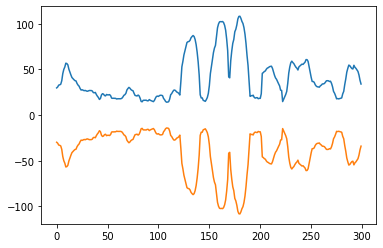

In [35]:
ax = sns.lineplot( x=range(len(bb)), y=bb['BB_UPPER'] - bb['BB_MIDDLE'])
sns.lineplot( x=range(len(bb)), y=bb['BB_LOWER'] - bb['BB_MIDDLE'], ax=ax)

In [36]:
TA.MOM(data)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
284   -25.5
285   -24.2
286   -22.6
287   -17.5
288    -1.4
Name: MOM, Length: 1445, dtype: float64

In [4]:
t = (1,2)

In [10]:
t = list(t)
t[0] = 3
t

[3, 2]

In [19]:
from functools import wraps


class Wrapper:
    def __init__(self):
        self.transforms = {}
        self.transforms["t"] = "test"

    def __getattr__(self, attr):
        func = getattr(tt, attr)
        @wraps(func)
        def _wrapped(*args, **kwargs):
            
            print("wrap")
            
            return func(*args, **kwargs)
        return _wrapped

    
def tt(t):
    print("hello")

In [20]:
w = Wrapper()

In [22]:
tt('t')

hello


In [ ]:
delta = data['Close'].diff()[:14]

In [63]:
up, down = delta.copy(), delta.copy()


In [64]:
up[up < 0] = 0
down[down > 0] = 0

In [65]:
_gain = up.ewm(alpha=1.0/14, adjust=True).mean()
_loss = down.abs().ewm(alpha=1.0/14, adjust=True).mean()

In [66]:
RS = _gain / _loss

In [67]:
RS

0          NaN
1     0.000000
2     0.000000
3     0.998000
4     0.922150
5     0.774280
6     0.446230
7     0.945377
8     0.515375
9     0.489773
10    0.658196
11    0.807568
12    0.796584
13    1.006522
Name: Close, dtype: float64

In [68]:
x = pd.Series(100 - (100 / (1 + RS)))

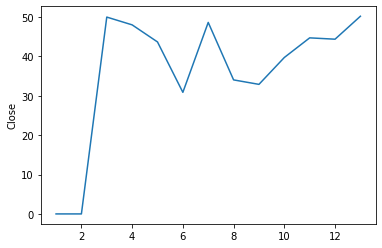

In [69]:
import seaborn as sns

sns.lineplot(x=range(len(x)), y=x)

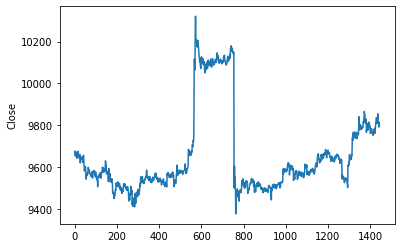

In [61]:
sns.lineplot(x=range(len(data['Close'])), y=data['Close'])